# Исследование объявлений о продаже квартир
* Цель исследования - Определить параметры влияющие на стоимость недвижимости.
* Данные на которых проводится исследование - из сервсиа Яндекс.Недвижимость, архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Данные деляться сосзданые пользователем и самим сервисом на основе введеной информации.
* Данное исследование может быть полезно для поиска закономерностей и аномалий.


**Ключевые слова:** обработка данных, histogram, boxplot, scattermatrix, категоризация, scatterplot, маркетинговый аналитик, фрод аналитик, fraud analyst, data analyst, аналитик данных, аналитик, analyst, фрод-мониторинг

### Шаг 1. Первичное знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t' )
# методом научного тыка я обнаружил как разделить их нормально. 
# почему это работает и что это такое не имею ни малейшего понятия
# сообственно в поисковик этот ( 	 )символ вставляется как пробел

file.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
file.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
print('Количество NaN:\n', file.isna().sum().sort_values())
print('Количество дубликатов без учёта регистра:',file.duplicated().sum())

Количество NaN:
 total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64
Количество дубликатов без учёта регистра: 0


In [5]:
# Заметна группа в которой пропущенно растояние до ближайшего пруда, парка, аэропорта и до центра, число прудов и парков в пределах 3км.  ~5518
# Также есть большая группа растояние до ближайшего парка и пруда ~  11334
print(file
      .query(
'ponds_around3000.isna() and parks_around3000.isna()  and cityCenters_nearest.isna() and airports_nearest.isna() and parks_nearest.isna() and ponds_nearest.isna()')
      .shape)
file.query('ponds_nearest.isna() and parks_nearest.isna()').shape


(5518, 22)


(11334, 22)

In [6]:
file.query('ponds_around3000.isna() and parks_around3000.isna() and cityCenters_nearest.isna() and airports_nearest.isna() and parks_nearest.isna() and ponds_nearest.isna()').head(5)
# Посмотрев на столбцы выяснил что нет какого-то 7го повторяющегося признака для этих 6. Скорее всего это баг. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


### Вывод

1.1 Для столбцов 

last_price             
total_area             
floors_total          
living_area             
kitchen_area            
balcony                
airports_nearest       
cityCenters_nearest    
parks_around3000       
parks_nearest           
ponds_around3000        
ponds_nearest           
days_exposition 

преобразовать данные к типу int чтобы сэкономить память и силы, учитываю встречаюищиеся пропущенные значения. 
    
1.2 Преобразовать столбец first_day_exposition в тип time и оставить только дату. Время публикации объявлений одно и то же 00:00.

1.3 is_apartment - Слишком много пропущенных значений. оставим столбец как есть. 

1.4 Не преобразовывать ceiling_height в тип int иначе погрешность будет на уровне 10 процентов примерно. 

1.5 Заполнить пропуски в столбце количество балконов, число прудов и парков в радиусе 3 км. 

1.6 Возможная причина такого большого количества пропусков в данных заполняемых автоматически программой - ошибка/баг в коде(техническая причина).

### Шаг 2. Предобработка данных

In [7]:
""" Если пропущена информация о количестве балконов, количестве парков и прудов то их скорее всего нет. 
Заполним пропущеные значения нулями."""
file['balcony'] = file['balcony'].fillna(0) 
file['ponds_around3000'] = file['ponds_around3000'].fillna(0) 
file['parks_around3000'] = file['parks_around3000'].fillna(0) 
file['is_apartment'] = file['is_apartment'].fillna(False) 


In [8]:
"""Преобразуем float в инт те значения которые не NaN. Пока не будем ничего выбрасывать """
file['last_price'] = file['last_price'].astype(int)              
file['total_area'] = file['total_area'].astype(int) 
file['balcony'] = file['balcony'].astype(int)      
file['ponds_around3000'] = file['ponds_around3000'].astype(int)  
file['parks_around3000'] = file['parks_around3000'].astype(int)    

' не смог найти способа преобразовать следующие столбцы в int. ведь в них есть NaN. Есть вариант написать для этого функцию и перебрать каждое значение. Писать не так долго но каждый раз обрабатывать всё это оно будет очень долго.'

In [9]:
file['is_apartment'].unique()

array([False,  True])

In [10]:
"""Переведём дату размещения в удобный формат """
file['first_day_exposition'] = pd.to_datetime(file['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
file['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [11]:
file.info()
# что-то от преобразования float в int нет особой пользы на таком масштабе данных. Размер не изменился. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В таких столбцах как `['ceiling_height']`, `['floors_total']`, `['living_area']`, `['kitchen_area']`, `['locality_name']`, `['airports_nearest']`, `['cityCenters_nearest']`, `['parks_nearest']`, `['ponds_nearest']`, `['days_exposition']`. Есть пропущенные значения.

Как известно, часть из них заполнял пользователь, поэтому он мог не заполнить `['ceiling_height']`, `['floors_total']`, `['living_area']`, `['kitchen_area']`, `['locality_name']`. 

Столбцы `['airports_nearest']`, `['cityCenters_nearest']`, `['parks_nearest']`, `['ponds_nearest']` полученны на основе картограффических данных поэтому пробелы тут могут быть объяснены ошибкой, отсутствием информации в картограффических данных и тд.

Заполнять средними по датасету значениями в условиях данной задачи не нужно. Выяснять какими же они были на самом деле и искать приближенные к ним значения крайне трудоёмкая задача которая не несет существенной выгоды в нашем случае.

Пробелы в столбце `['days_exposition']` говорят о том что объявление ещё актуально. 

### Шаг 3. Добавить в таблицу

In [12]:
"""ценна квадратного метра - square_meter_price"""
file['square_meter_price']=file['last_price']/file['total_area']

'''день недели, месяц и год публикации объявления. '''
file['first_day_exposition_round'] = file['first_day_exposition'].dt.round('1D')

"""этаж квартиры; варианты — первый, последний, другой - floor_group"""
file['floor_group'] = file['floor']/file['floors_total'] 
for i in range(0,len(file)):
    if file['floor'][i] == 1:
        file.loc[i,'floor_group'] = 'первый'
    elif file['floor'][i] == file['floors_total'][i]:
        file.loc[i,'floor_group'] = 'последний'
    else:
        file.loc[i,'floor_group'] = 'другой'
        
"""соотношение жилой и общей площади, а также отношение площади кухни к общей."""
file['ratio_living_total'] = file['living_area']/file['total_area']
file['ratio_kitchen_total'] = file['kitchen_area']/file['total_area']


In [13]:
file['weekday_first_day_exposition'] = file['first_day_exposition'].dt.weekday
file['month_first_day_exposition'] = file['first_day_exposition'].dt.month
file['year_first_day_exposition'] = file['first_day_exposition'].dt.year

In [14]:
"""Проверим результат добавления столбцов"""
file.loc[:,['square_meter_price','ratio_living_total','ratio_kitchen_total']].describe()

,square_meter_price,ratio_living_total,ratio_kitchen_total
count,2.369900e+04,21796.000000,21421.000000
mean,9.987413e+04,0.567389,0.188295
std,5.041842e+04,0.105641,0.073508
min,1.118349e+02,0.021583,0.025381
25%,7.698551e+04,0.500000,0.133673
50%,9.545455e+04,0.571429,0.173077
75%,1.148649e+05,0.640909,0.233333
max,1.907500e+06,1.008333,0.787879


In [15]:
file['floor_group'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: floor_group, dtype: object

In [16]:
file['first_day_exposition_round'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition_round, dtype: object

### Шаг 4. Исследовательский анализ данных:

#### 4.1 Площадь, цена, число комнат, высота потолков. 
Гистограммы для каждого параметра.

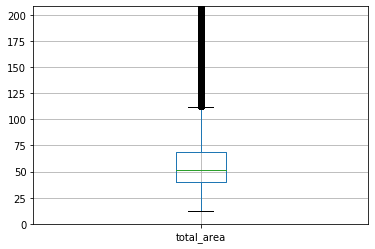

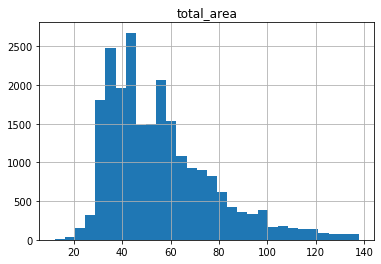

count    23699
mean        60
std         35
min         12
25%         40
50%         52
75%         69
max        900
Name: total_area, dtype: int64


In [17]:
"""Исследование площади квартиры(м^2)"""
file.boxplot(column = 'total_area')
plt.ylim(0, file['total_area'].median()*4)
plt.show()
file.hist( column = 'total_area' , range = (12,138) , bins = 30 )
plt.show()
print(file['total_area'].describe().astype('int'))
kvart3area = 69

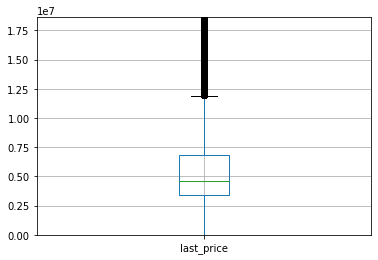

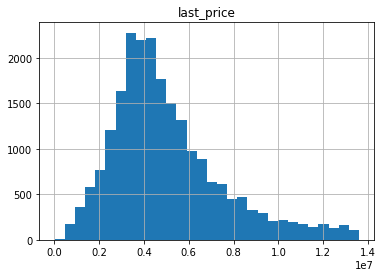

count        23699
mean       6541548
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int64


In [18]:
"""Цена на момент снятия с публикации"""
file.boxplot(column = 'last_price')

plt.ylim(0, file['last_price'].median()*4)
plt.show()
file.hist( column = 'last_price', range = (1.219000e+04,6.800000e+06 * 2) , bins = 30)
plt.show()
print(file['last_price'].describe().astype('int'))
kvart3price = 6.800000e+06

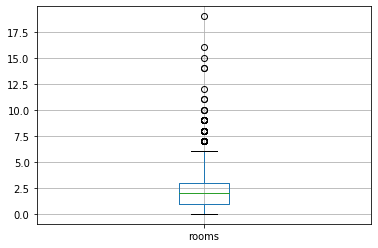

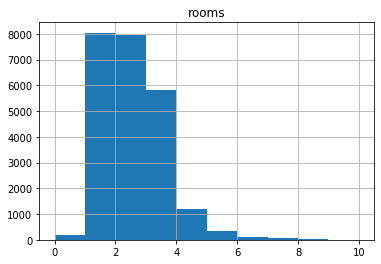

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64


In [20]:
""" Количество комнат """
file.boxplot( column = 'rooms' )
plt.show()
file.hist( column = 'rooms' , bins = 10 , range = (0,10) )
plt.show()
print(file['rooms'].describe().astype('int'))
kvart3rooms = 3

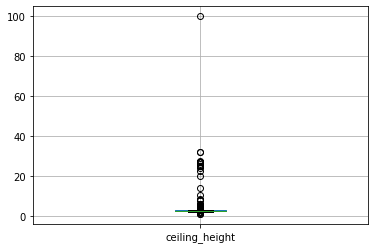

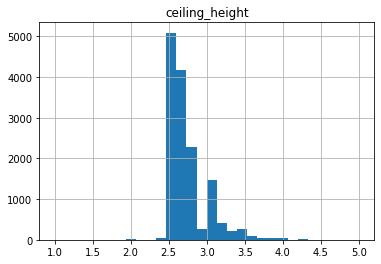

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [21]:
""" Высота потолков """
file.boxplot(column = 'ceiling_height')
file.hist( column = 'ceiling_height' ,  bins = 30 , range = ( 1 , 5) )
plt.show()
print(file['ceiling_height'].describe())
kvart3height = 2.8

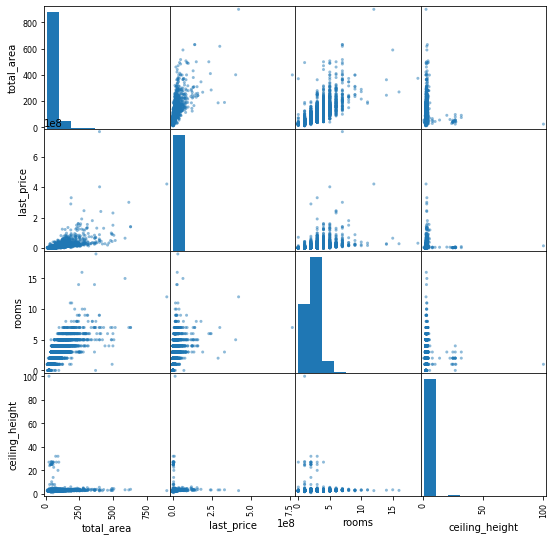

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.653654  0.758347        0.095643
last_price        0.653654    1.000000  0.363343        0.085430
rooms             0.758347    0.363343  1.000000        0.054457
ceiling_height    0.095643    0.085430  0.054457        1.000000


In [22]:
data=file.loc[:,['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(data, figsize=(9, 9))
plt.show()
print(data.corr())
datacorr1 = data.corr()

#### Вывод 4.1 
    1. Площадь
        а)Есть выбросы с экстремально большой площадью, например s = 900 м^2
        б)Средняя площадь в районе 52-60 м^2
    2. Цена
        а)Есть выбросы c экстремально большой стоимостью, например 7.630000e+08 рублей.(мы же в рублях считаем? на самом деле не важно для отчёта, ну просто писать так удобней)
        б) Экстремальные значения на 2 порядка превосходят средние, которое кстати равно  4.650000e+06 р
    3. Количестве комнат
        а)В Количестве комнат нет выбросов на порядки, но 19 комнат всё же совсем не типичны для обычной квартиры.
        б)В среднем комнат 2.
    4. Высота потолков
        а)В высоте полтолков есть аномальное значени в высоте потолков 100 м.
        б)В среднем высота потолков 2,65 м. 
        в)Есть значения до первого квартиля.
Кореляция между ними есть, она положительная(что ожидаемо). Следует избавиться от значений выше третьего квартиля, как от выбросов. Эти параметры расматривать вместе кажется нормальным, и мы заранее знаем что кореляция между ними должна быть. 

#### Изучите время продажи квартиры. 
1. Постройте гистограмму. 
2. Посчитайте среднее и медиану. 
3. Опишите, сколько обычно занимает продажа. 
4. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


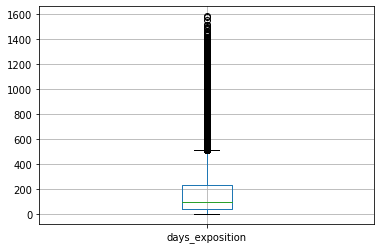

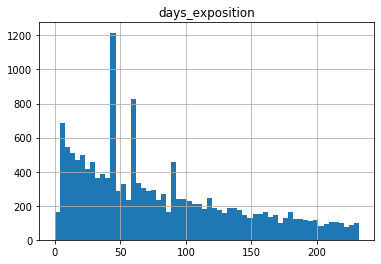

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [23]:
file.boxplot( column = 'days_exposition' )
plt.show()
file.hist( column = 'days_exposition', bins = 60 , range = (0,232))# строю гистограмму от нуля до третьего квартиля
plt.show()
print( file['days_exposition'].describe() )
kvart3exposition = 232

#### Вывод 4.2 Время продажи квартиры
1. Наблюдаются 3 нехарактерных пика на гистограмме, выбивающихся из распределения по Гаусу. Таким образом среднее значение отличается от медианы в 2 раза. 
2. Обычно продажа квартиры заниает около 95 дней(возьмём медианное значение поскольку оно не чувствительно к выбросам).
3. Те случаи когда квартира продаётся более 232 дней будем считать что она продается долго. И когда менее 45 то быстро.




#### 4.3 Редкие и выбивающиеся значения. 

In [25]:
data2=file.loc[:,['total_area','last_price','rooms','ceiling_height']]
a1=data2['total_area'].describe().loc['25%'] - 1.5 * data2['total_area'].describe().loc['std']
a2=data2['total_area'].describe().loc['50%'] + 1.5 * data2['total_area'].describe().loc['std']
p1=data2['last_price'].describe().loc['25%'] - 1.5 * data2['last_price'].describe().loc['std']
p2=data2['last_price'].describe().loc['50%'] + 1.5 * data2['last_price'].describe().loc['std'] 
data2 = data2.query('@a1 <=total_area <=@a2 and @p1<=last_price <=@p2')

In [26]:
data2.head()

,total_area,last_price,rooms,ceiling_height
1,40,3350000,1,NaN
2,56,5196000,2,NaN
4,100,10000000,2,3.03
5,30,2890000,1,NaN
6,37,3700000,1,NaN


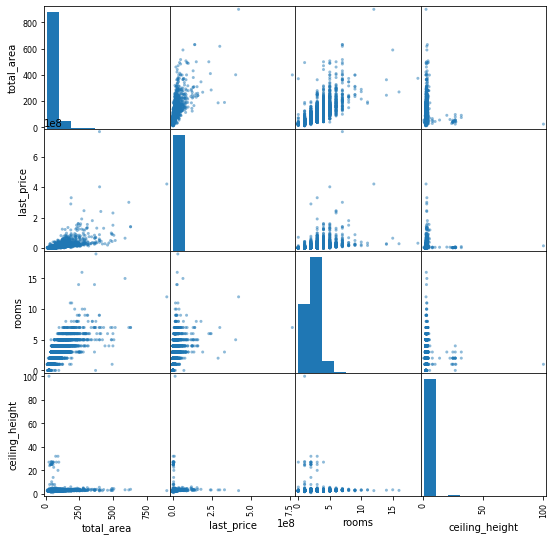

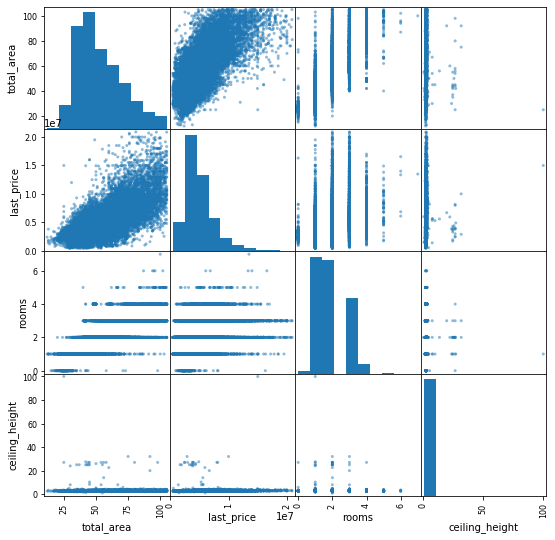

In [27]:
pd.plotting.scatter_matrix(data, figsize=(9, 9))
plt.show()
pd.plotting.scatter_matrix(data2, figsize=(9, 9))
plt.show()
datacorr2 = data2.corr()

In [28]:
datacorr1

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.653654,0.758347,0.095643
last_price,0.653654,1.000000,0.363343,0.085430
rooms,0.758347,0.363343,1.000000,0.054457
ceiling_height,0.095643,0.085430,0.054457,1.000000


In [29]:
datacorr2

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.704858,0.791344,0.055899
last_price,0.704858,1.000000,0.409099,0.094269
rooms,0.791344,0.409099,1.000000,0.011334
ceiling_height,0.055899,0.094269,0.011334,1.000000


#### Вывод 4.3
1. Оставленны только значения в стандартном диапазоне по общей площади и цене. Все усы отброшенны. 
2. 3 выброса на времени продажи квартирыи следующие 2 по уменьшению идут в таком порядке: 
    45, 60, 7, 30, 90. Круглые сроки, что говорит о том что эти объявления могли сниматься автоматически. Выбрасывать их не будем.

#### 4.4 Как зависит цена квартиры от таких параметров как:
1. Ценна квадратного метра
2. Числа комнат,
3. Удалённости
4. На каком этаже расположена квартира.
5. Дата размещения:
    1. День недели
    2. Месяц.
    3. Год.
    
    


##### Посмотрим кореляцию цены с такими параметрами как:
1. Ценна квадратного метра
2. Число комнат
3. Удалённости

In [30]:
df=data2.merge(file, how ='left') # создаю новый датафрейм полный на основе столбцов без выбросов (площадь, цена, комнаты, высота потолков, время размещения)

In [31]:
df1=df.loc[:,['last_price','square_meter_price','rooms','cityCenters_nearest']]

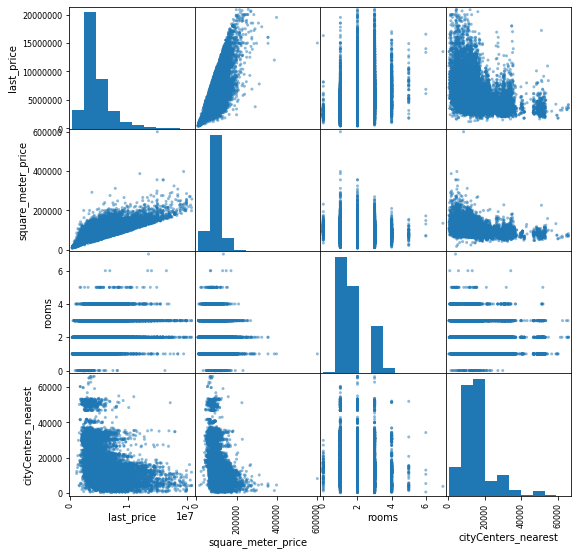

,last_price,square_meter_price,rooms,cityCenters_nearest
last_price,1.000000,0.661751,0.449765,-0.316857
square_meter_price,0.661751,1.000000,-0.183313,-0.383558
rooms,0.449765,-0.183313,1.000000,-0.079549
cityCenters_nearest,-0.316857,-0.383558,-0.079549,1.000000


In [32]:
pd.plotting.scatter_matrix(df1, figsize=(9 ,9))
plt.show()
df1.corr()

##### Вывод. Как зависит цена от цены за квадратный метр, количесва комнат и удалённости от центра? 
1. Существует умеренно положительная корреляция между ценной и ценной за квардратный метр, числом комнат с коэфициентами пирсона 0,62 и 0,47 соответственно, что может свидетельствовать о наличии линейной связи между рассматриваемыми величинами. 
2. Существует умеренно отрицательная корреляция между ценной и растоянием до центра с коэфициентами пирсона -0,43, что может свидетельствовать о наличии линейной связи между рассматриваемыми величинами.

##### Посмотрим зависимость по этажам

In [33]:
df.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = ['mean','median']).sort_values(by =('mean','last_price') )

,mean,median
,last_price,last_price
floor_group,,
первый,3.963034e+06,3600000
последний,4.334459e+06,3800000
другой,4.801623e+06,4200000


In [34]:
df.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = ['mean','median']).max()/df.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = ['mean','median']).min()

mean    last_price    1.211603
median  last_price    1.166667
dtype: float64

##### Вывод о зависимости цены и этажа на котором расположена квартира
Квартиры на первом и последнем этаже дешевле других квартир. 
Так квартиры на других этажах примерно в 1.2 в среднем и в 1.1 по медиане дороже квартир на первом этаже. 

##### Посмотрим на связь цены квартиры от года, месяца, дня недели публикации.

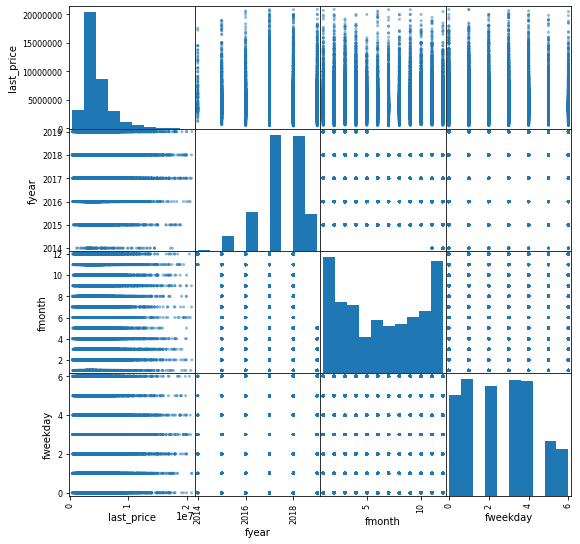

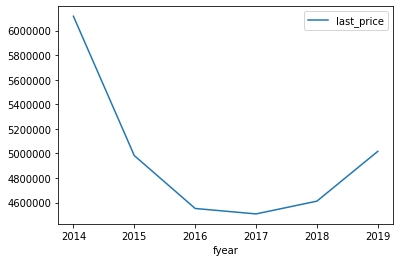

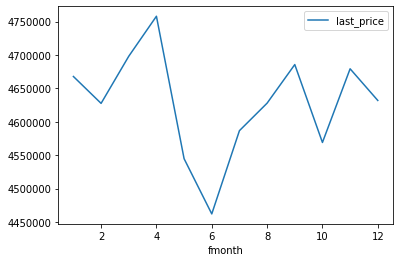

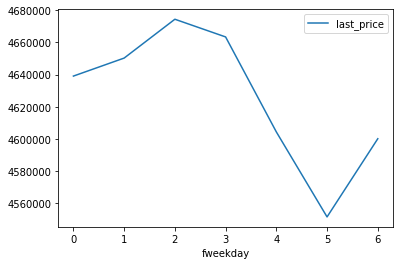

In [35]:
df['fyear'] = df['first_day_exposition'].dt.year
df['fmonth'] = df['first_day_exposition'].dt.month
df['fweekday'] = df['first_day_exposition'].dt.weekday
data5=df.loc[:,['last_price','fyear','fmonth','fweekday']]
pd.plotting.scatter_matrix(data5, figsize=(9, 9))
data5.pivot_table(index='fyear',values='last_price').plot()
plt.show()
data5.pivot_table(index='fmonth',values='last_price').plot()
plt.show()
data5.pivot_table(index='fweekday',values='last_price').plot()
plt.show()


In [36]:
data5.pivot_table(index='fyear', values='last_price').sort_values(by='last_price')

,last_price
fyear,
2017,4.507694e+06
2016,4.552026e+06
2018,4.611545e+06
2015,4.982511e+06
2019,5.016923e+06
2014,6.116671e+06


In [37]:
print('Во сколько раз средняя цена по годам больше минимума')
data5.pivot_table(index='fyear', values='last_price').mean()/data5.pivot_table(index='fyear', values='last_price').min()

Во сколько раз средняя цена по годам больше минимума


last_price    1.101353
dtype: float64

In [38]:
print('Во сколько раз средняя цена по месяцам больше минимума')
data5.pivot_table(index='fmonth', values='last_price').mean()/data5.pivot_table(index='fmonth', values='last_price').min()

Во сколько раз средняя цена по месяцам больше минимума


last_price    1.037244
dtype: float64

In [39]:
print('Во сколько раз средняя цена по дням недели больше минимума')
data5.pivot_table(index='fweekday', values='last_price').mean()/data5.pivot_table(index='fweekday', values='last_price').min()

Во сколько раз средняя цена по дням недели больше минимума


last_price    1.01642
dtype: float64

#### Вывод 4.4 
1. Существует умеренно положительная корреляция между ценной и ценной за квардратный метр, числом комнат с коэфициентами пирсона 0,62 и 0,47 соответственно, что может свидетельствовать о наличии линейной связи между рассматриваемыми величинами. 
2. Существует умеренно отрицательная корреляция между ценной и растоянием до центра с коэфициентами пирсона -0,43, что может свидетельствовать о наличии линейной связи между рассматриваемыми величинами.
4. Цена квартиры на любых этажах кроме первого и последнего больше в 1.2 раза.
5. Средняя Цена квартиры в зависимости от даты размещения.
    1. Среднегодовая цена упала с 2014. Минимум был в 2017. Сейчас же цена повышается.
    2. Июнь это месяц где меньше всего ценна за квартиры. Вероятно это связано с тем что квариты сдают на лето. Средняя цена по месяцам в 1.037 раза  больше минимума. 
    3. Суббота это день недели с наименьшей ценной за квартиру. Средняя цена по дням недели в 1.016 раза больше минимума. 

#### 4.5 Топ-10 населённых пунктов с наибольшим числом объявлений
Изучим среднюю цену в топ-10

In [40]:
aa = df.pivot_table( index = 'locality_name', values = 'square_meter_price',aggfunc = ['count','mean'])

In [41]:
aa.sort_values( by = ('count', 'square_meter_price'), ascending = False).head(10).sort_values( by = ('mean', 'square_meter_price'))

,count,mean
,square_meter_price,square_meter_price
locality_name,,
Всеволожск,499,69019.638306
Гатчина,489,71236.967597
Колпино,589,78112.189739
посёлок Шушары,718,81527.708561
Петергоф,338,85125.122902
посёлок Мурино,966,89022.142505
посёлок Парголово,586,94574.463823
деревня Кудрово,575,94587.728026


#### Вывод 4.5 
Самая большая цена за квадратный метр из 10 популярных населенных пунктов у Санкт-Петербурга. Самая низкая у Всеволожска.

#### 4.6 Исторический центр города Санкт-Петербург
Центр города отличается от окраин своей застройкой, найдём эту границу.

In [42]:
df2=df.query('locality_name == "Санкт-Петербург"').copy() # df2 срез данных по городу "Санкт-Петербург"

In [43]:
df2.loc[:,'centrkm'] = (df2.loc[:,'cityCenters_nearest']/1000).round()

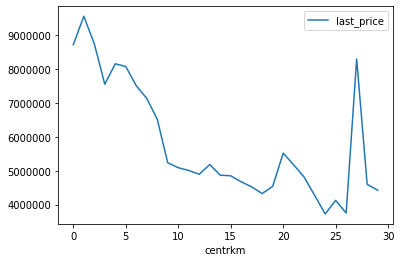

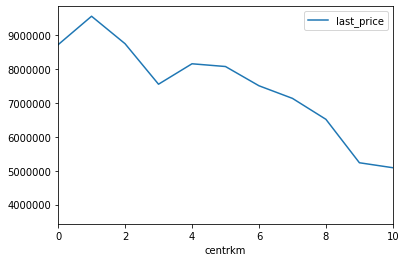

In [44]:
df2.pivot_table(index='centrkm',values='last_price').plot()
plt.show()
df2.pivot_table(index='centrkm',values='last_price').plot()
plt.xlim(0,10)
plt.show()

#### Вывод 4.6 
Граница на которой меняется резко цена = 9 км

#### 4.7 Отличаются ли параметры определяющие стоимость жилья в центре?

In [45]:
df3=df2.query('centrkm<10').copy() # df3 срез данных по центральному району
df4=df3.loc[:,['total_area','last_price','rooms','ceiling_height','floor_group','first_day_exposition','cityCenters_nearest']]
# надо объединять таблицы

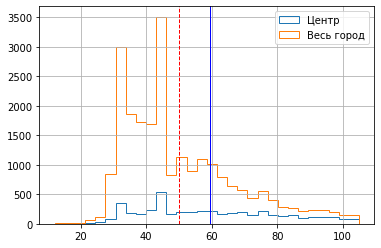

Средняя площадь: Центр Санкт-Петербурга(сплошная синия)
59.47
Средняя площадь: Весь Санкт-Петербург(пунктирная красная)
 49.97
Средняя площадь в центре больше чем во всем городе в: 
 1.19


In [46]:
"""Исследование площади квартиры(м^2) по всему городу и только в центре Санкт-Петергбурга"""
plt.hist(x=df3['total_area'],bins=30,label='Центр',histtype='step' )
plt.axvline(x=df3['total_area'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df2['total_area'],bins=30, label='Весь город',histtype='step')

plt.axvline(x=df2['total_area'].mean(), color='r', linestyle='--', linewidth=1)

plt.legend(loc='upper right')
plt.grid()


plt.show()

print('Средняя площадь: Центр Санкт-Петербурга(сплошная синия)\n{:.2f}'.format(df3['total_area'].mean()))
print('Средняя площадь: Весь Санкт-Петербург(пунктирная красная)\n {:.2f}'.format(df2['total_area'].mean()))
print('Средняя площадь в центре больше чем во всем городе в: \n {:.2f}'.format(df3['total_area'].mean()/df2['total_area'].mean()))

##### Вывод для площади 
Квартиры в центре города больше чем по всему городу.

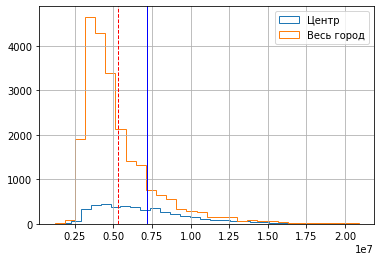

Средняя цена: Центр Санкт-Петербурга(сплошная синия)
7145476.57
Средняя цена: Весь Санкт-Петербург(пунктирная красная)
 5308399.63
Средняя цена в центре больше чем во всем городе в: 
 1.35


In [47]:
"""Цена на момент снятия с публикации для всего города и центра"""
plt.hist(x=df3['last_price'],bins=30,label='Центр',histtype='step')

plt.axvline(x=df3['last_price'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df2['last_price'],bins=30, label='Весь город',histtype='step')

plt.axvline(x=df2['last_price'].mean(), color='r', linestyle='--', linewidth=1)

plt.legend(loc='upper right')
plt.grid()
plt.show()

print('Средняя цена: Центр Санкт-Петербурга(сплошная синия)\n{:.2f}'.format(df3['last_price'].mean()))
print('Средняя цена: Весь Санкт-Петербург(пунктирная красная)\n {:.2f}'.format(df2['last_price'].mean()))
print('Средняя цена в центре больше чем во всем городе в: \n {:.2f}'.format(df3['last_price'].mean()/df2['last_price'].mean()))

##### Вывод для цены 
Цена в центре Питера больше чем по всему городу. 

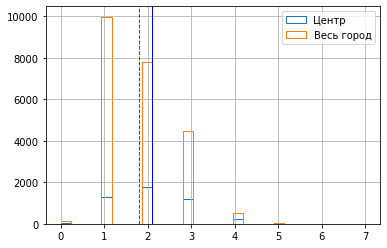

Среднее число комнат в квартире: Центр Санкт-Петербурга(сплошная синия)
2.09
Среднее число комнат в квартире: Весь Санкт-Петербург(пунктирная красная)
 1.80
Среднее число комнат в квартире в центре больше чем во всем городе в: 
 1.16


In [49]:
"""Среднее число комнат в квартире в квартирах в центре и по всему городу"""
plt.hist(x=df3['rooms'],bins=30,label='Центр',histtype='step')

plt.axvline(x=df3['rooms'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df2['rooms'],bins=30, label='Весь город',histtype='step')

plt.axvline(x=df2['rooms'].mean(), color='r', linestyle='--', linewidth=1)

plt.legend(loc='upper right')
plt.grid()
plt.show()

print('Среднее число комнат в квартире: Центр Санкт-Петербурга(сплошная синия)\n{:.2f}'.format(df3['rooms'].mean()))
print('Среднее число комнат в квартире: Весь Санкт-Петербург(пунктирная красная)\n {:.2f}'.format(df2['rooms'].mean()))
print('Среднее число комнат в квартире в центре больше чем во всем городе в: \n {:.2f}'.format(df3['rooms'].mean()/df2['rooms'].mean()))

##### Вывод для количества комнат 
Среднее количество комнат в центре Питера больше чем по всему городу. Но по медианному значению такое же = 2. 

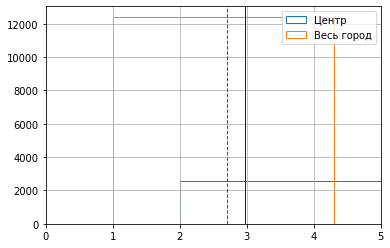

Средняя высота потолков: Центр Санкт-Петербурга(сплошная синия)
2.98
Средняя высота потолков: Весь Санкт-Петербург(пунктирная красная)
 2.71
Средняя высота потолков в центре больше чем во всем городе в: 
 1.10


In [50]:
"""Высота потолков на момент снятия с публикации для всего города и центра"""
plt.hist(x=df3['ceiling_height'],bins=30,label='Центр',histtype='step')
plt.xlim(0,5)

plt.axvline(x=df3['ceiling_height'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df2['ceiling_height'],bins=30, label='Весь город',histtype='step')

plt.axvline(x=df2['ceiling_height'].mean(), color='r', linestyle='--', linewidth=1)

plt.legend(loc='upper right')
plt.grid()

plt.show()

print('Средняя высота потолков: Центр Санкт-Петербурга(сплошная синия)\n{:.2f}'.format(df3['ceiling_height'].mean()))
print('Средняя высота потолков: Весь Санкт-Петербург(пунктирная красная)\n {:.2f}'.format(df2['ceiling_height'].mean()))
print('Средняя высота потолков в центре больше чем во всем городе в: \n {:.2f}'.format(df3['ceiling_height'].mean()/df2['ceiling_height'].mean()))

##### Вывод для Высоты потолков
Высота потолков в центре Питера больше чем по всему городу. 

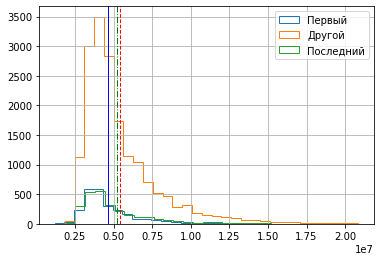

Средняя цена для первого этажа по всему городу (сплошная синия)
4645570.92
Средняя цена для не первого и не последнего этажа по всему городу (пунктирная красная) 
 5413641.72
Средняя цена для последнего этажапо всему городу (зеленая пунктир с точкой)
 5236801.77


In [55]:
"""Цена на момент снятия с публикации для всего города для разных этажей"""
plt.hist(x=df2.query('floor_group == "первый"')['last_price'],bins=30,label='Первый',histtype='step')

plt.axvline(x=df2.query('floor_group == "первый"')['last_price'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df2.query('floor_group == "другой"')['last_price'],bins=30, label='Другой',histtype='step')

plt.axvline(x=df2.query('floor_group == "другой"')['last_price'].mean(), color='r', linestyle='--', linewidth=1)

plt.hist(x=df2.query('floor_group == "последний"')['last_price'],bins=30, label='Последний',histtype='step')

plt.axvline(x=df2.query('floor_group == "последний"')['last_price'].mean(), color='g', linestyle='-.', linewidth=1)

plt.legend(loc='upper right')
plt.grid()
plt.show()

print('Средняя цена для первого этажа по всему городу (сплошная синия)\n{:.2f}'.format(df2.query('floor_group == "первый"')['last_price'].mean()))
print('Средняя цена для не первого и не последнего этажа по всему городу (пунктирная красная) \n {:.2f}'.format(df2.query('floor_group == "другой"')['last_price'].mean()))
print('Средняя цена для последнего этажапо всему городу (зеленая пунктир с точкой)\n {:.2f}'.format(df2.query('floor_group == "последний"')['last_price'].mean()))

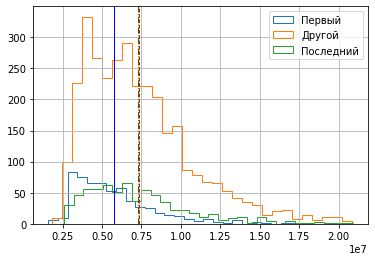

Средняя цена для первого этажа по центру города (сплошная синия)
5764188.18
Средняя цена для не первого и не последнего этажа по центру города (пунктирная красная) 
 7360810.39
Средняя цена для последнего этажа по центру города
 7302785.90


In [53]:
"""Цена на момент снятия с публикации для центра города для разных этажей"""
plt.hist(x=df3.query('floor_group == "первый"')['last_price'],bins=30,label='Первый',histtype='step')

plt.axvline(x=df3.query('floor_group == "первый"')['last_price'].mean(), color='b', linestyle='-', linewidth=1)

plt.hist(x=df3.query('floor_group == "другой"')['last_price'],bins=30, label='Другой',histtype='step')

plt.axvline(x=df3.query('floor_group == "другой"')['last_price'].mean(), color='r', linestyle='--', linewidth=1)

plt.hist(x=df3.query('floor_group == "последний"')['last_price'],bins=30, label='Последний',histtype='step')

plt.axvline(x=df3.query('floor_group == "последний"')['last_price'].mean(), color='g', linestyle='-.', linewidth=1)

plt.legend(loc='upper right')
plt.grid()
plt.show()

print('Средняя цена для первого этажа по центру города (сплошная синия)\n{:.2f}'.format(df3.query('floor_group == "первый"')['last_price'].mean()))
print('Средняя цена для не первого и не последнего этажа по центру города (пунктирная красная) \n {:.2f}'.format(df3.query('floor_group == "другой"')['last_price'].mean()))
print('Средняя цена для последнего этажа по центру города\n {:.2f}'.format(df3.query('floor_group == "последний"')['last_price'].mean()))

In [54]:
print('Средняя цена в центре для первого этажа больше в \n{:.2f}'.format(df3.query('floor_group == "первый"')['last_price'].mean()/df2.query('floor_group == "первый"')['last_price'].mean()))
print('Средняя цена в центре для другого этажа больше в \n {:.2f}'.format(df3.query('floor_group == "другой"')['last_price'].mean()/df2.query('floor_group == "другой"')['last_price'].mean()))
print('Средняя цена в центре для последнего этажа больше в \n{:.2f}'.format(df3.query('floor_group == "последний"')['last_price'].mean()/df2.query('floor_group == "последний"')['last_price'].mean()))

Средняя цена в центре для первого этажа больше в 
1.24
Средняя цена в центре для другого этажа больше в 
 1.36
Средняя цена в центре для последнего этажа больше в 
1.39


##### Вывод для групп этажей
В центре квартиры:
    1. на первом этаже дороже в 1,24 раза.
    2. на последнем в 1,39 раз дороже.
    3. другие в 1,36 раз дороже.

#### Вывод 4.7
Параметры определяющие стоимость такие же как и для окраин. В целом, в центре самые большие(больше площадь, комнат и выше потолки) и дорогие квартиры. А разница в цене между группами этажей в центре и во всем городе самая большая у последних этажей.

##### Удалённость от центра и цена
Рассмотрим подробней эту зависимость

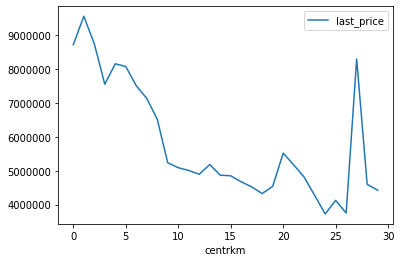

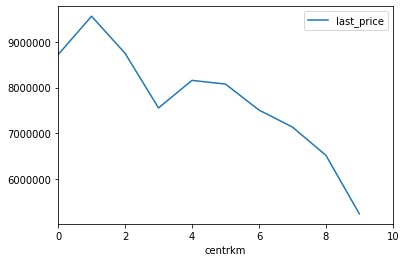

In [56]:
df2.pivot_table(index='centrkm',values='last_price').plot()
plt.show()
df3.pivot_table(index='centrkm',values='last_price').plot()
plt.xlim(0,10)
plt.show()


##### Вывод по зависимости ценны от удалённости от центра для центрайльного района и всего города
С увеличением растояния от центра города ценна убывает. Как для центрального района, так и для всего города. Но в центре она убывает быстрее.

##### Зависимость цены от даты размещения по центру

По всему городу


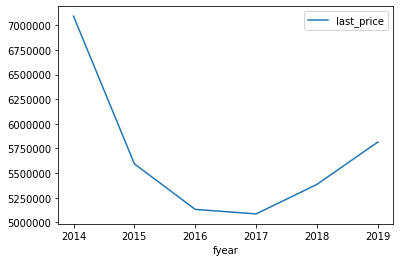

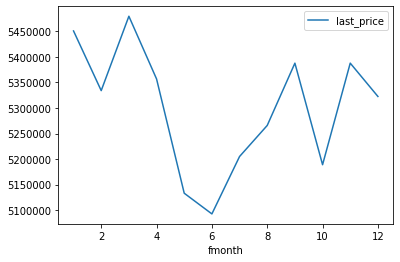

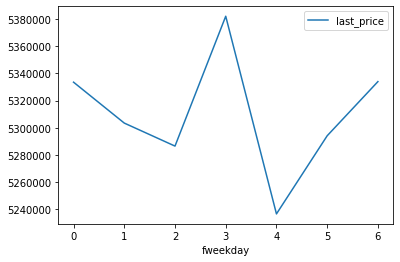

In [57]:
df2['fyear'] = df2['first_day_exposition'].dt.year
df2['fmonth'] = df2['first_day_exposition'].dt.month
df2['fweekday'] = df2['first_day_exposition'].dt.weekday
print('По всему городу')
df2.pivot_table(index='fyear',values='last_price').plot()
plt.show()
df2.pivot_table(index='fmonth',values='last_price').plot()
plt.show()
df2.pivot_table(index='fweekday',values='last_price').plot()
plt.show()

По центру города


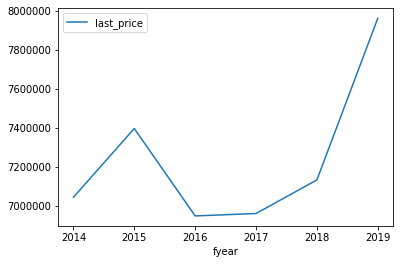

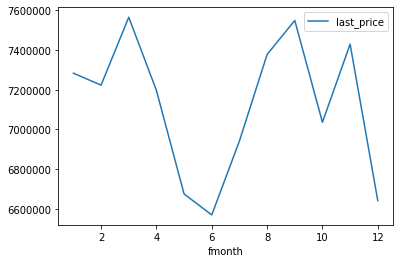

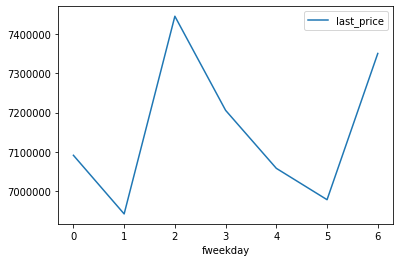

In [58]:
print('По центру города')

df3['fyear'] = df3['first_day_exposition'].dt.year
df3['fmonth'] = df3['first_day_exposition'].dt.month
df3['fweekday'] = df3['first_day_exposition'].dt.weekday
df3.pivot_table(index='fyear',values='last_price').plot()
plt.show()
df3.pivot_table(index='fmonth',values='last_price').plot()
plt.show()
df3.pivot_table(index='fweekday',values='last_price').plot()
plt.show()

Этот график показывает как менялось отношение средней цены в центре и во всем городе.


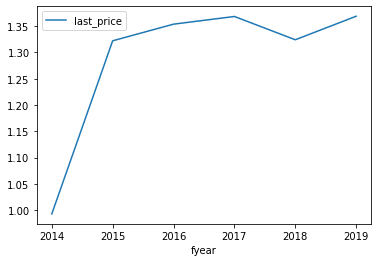

In [59]:
print('Этот график показывает как менялось отношение средней цены в центре и во всем городе.')
(df3.pivot_table(index='fyear',values='last_price')/
df2.pivot_table(index='fyear',values='last_price')).plot()
plt.show()

##### Вывод о влиянии даты публикации на цену в центре и по всему городу 
Средняя цена на квартиры по всему городу и по центру возрасла к настоящему моменту с 2017 года.
В остальном также в июне цена минимальна как в центре так и во всем городе.
В пятницу минимум цены во всём городе, а в центре 2 минимума вторник и пятница.

##### Так же ли корелируют иследуемые величины в центре?

In [60]:
df2.columns

Index(['total_area', 'last_price', 'rooms', 'ceiling_height', 'total_images',
       'first_day_exposition', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_meter_price',
       'first_day_exposition_round', 'floor_group', 'ratio_living_total',
       'ratio_kitchen_total', 'weekday_first_day_exposition',
       'month_first_day_exposition', 'year_first_day_exposition', 'fyear',
       'fmonth', 'fweekday', 'centrkm'],
      dtype='object')

In [82]:
ddf2=df2.loc[:,['last_price','total_area','rooms','ceiling_height','cityCenters_nearest']].copy()
ddf2.corr()


,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.806418,0.509320,0.131001,-0.364119
total_area,0.806418,1.000000,0.804933,0.082336,-0.236995
rooms,0.509320,0.804933,1.000000,0.026010,-0.168890
ceiling_height,0.131001,0.082336,0.026010,1.000000,-0.110578
cityCenters_nearest,-0.364119,-0.236995,-0.168890,-0.110578,1.000000


In [83]:
ddf3=df3.loc[:,['last_price','total_area','rooms','ceiling_height','cityCenters_nearest']].copy()
ddf3.corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.749502,0.456951,0.095779,-0.327751
total_area,0.749502,1.000000,0.791353,0.030677,-0.324556
rooms,0.456951,0.791353,1.000000,0.006956,-0.259414
ceiling_height,0.095779,0.030677,0.006956,1.000000,-0.063276
cityCenters_nearest,-0.327751,-0.324556,-0.259414,-0.063276,1.000000


##### Вывод для кореляции
Корелирует почти также

### Рассмотрим ещё некоторые из параметров
#### 5.1 Зависимость средней цены квартиры от
    5.1.1 количества балконов
    5.1.2 количества прудов
    5.1.3 количества парков
    5.1.4 количества фотографий
#### 5.2 Кореляция цены от 
    5.2.1 растояния до
        5.2.1.1 ближайшего аэропорта
        5.2.1.2 ближайшего пруда
        5.2.1.3 ближайшего парка 
    5.2.2 площади кухни
    5.2.3 соотношения площади кухни и полной площади
    5.2.4 соотношения жилой площади и полной площади
      
       

Зависимость средней(median) цены от количества балконов


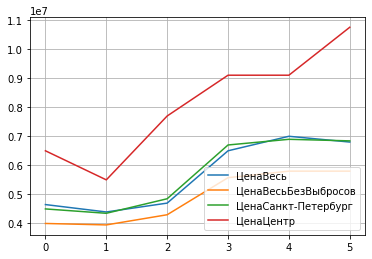

In [84]:
print('Зависимость средней(median) цены от количества балконов')
plt.plot(file.pivot_table(index = 'balcony', values='last_price',aggfunc = 'median'), label = 'ЦенаВесь')

plt.plot(df.pivot_table(index = 'balcony', values='last_price',aggfunc = 'median'), label = 'ЦенаВесьБезВыбросов')

plt.plot(df2.pivot_table(index = 'balcony', values='last_price',aggfunc = 'median'), label = 'ЦенаСанкт-Петербург')

plt.plot(df3.pivot_table(index = 'balcony', values='last_price',aggfunc = 'median'), label = 'ЦенаЦентр')

plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Вывод 5.1.1
Квартиры с числом балконов три и больше дороже остальных, как для центра Санкт-Петербурга так и для остального датасета

##### 5.1.2 Зависимость средней цены квартиры от количества прудов

Зависимость средней(median) цены от количества прудов


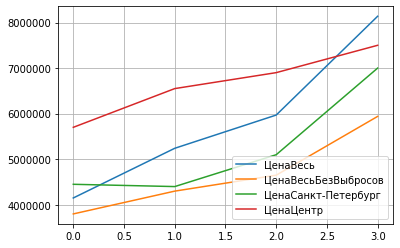

In [85]:
print('Зависимость средней(median) цены от количества прудов')
plt.plot(file.pivot_table(index = 'ponds_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаВесь')

plt.plot(df.pivot_table(index = 'ponds_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаВесьБезВыбросов')

plt.plot(df2.pivot_table(index = 'ponds_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаСанкт-Петербург')

plt.plot(df3.pivot_table(index = 'ponds_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаЦентр')

plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Вывод 5.1.2 Зависимость средней цены квартиры от количества прудов
С ростом количества прудов в радиусе 3км растёт и цена квартиры для центра и всего остального.


####  5.1.3 Зависимость средней цены квартиры от количества парков

Зависимость средней(median) цены от количества парков в радиусе 3 км


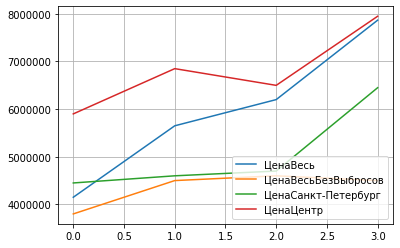

In [86]:
print('Зависимость средней(median) цены от количества парков в радиусе 3 км')
plt.plot(file.pivot_table(index = 'parks_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаВесь')

plt.plot(df.pivot_table(index = 'parks_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаВесьБезВыбросов')

plt.plot(df2.pivot_table(index = 'parks_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаСанкт-Петербург')

plt.plot(df3.pivot_table(index = 'parks_around3000', values='last_price',aggfunc = 'median'), label = 'ЦенаЦентр')

plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Вывод 5.1.3 Зависимость средней цены квартиры от количества парков
С ростом количества парков в радиусе 3км растёт и цена квартиры для центра и всего остального.


##### 5.1.4 Зависимость средней цены квартиры от количества фотографий

Зависимость средней(median) цены от количества фотографий


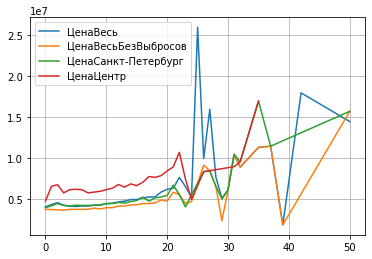

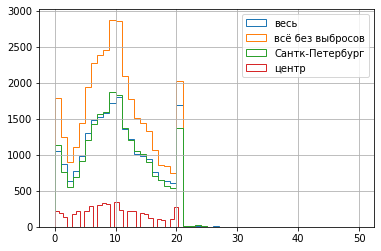

Среднее количество фотографий:  9.0


In [87]:
print('Зависимость средней(median) цены от количества фотографий')
plt.plot(file.pivot_table(index = 'total_images', values='last_price',aggfunc = 'median'), label = 'ЦенаВесь')

plt.plot(df.pivot_table(index = 'total_images', values='last_price',aggfunc = 'median'), label = 'ЦенаВесьБезВыбросов')

plt.plot(df2.pivot_table(index = 'total_images', values='last_price',aggfunc = 'median'), label = 'ЦенаСанкт-Петербург')

plt.plot(df3.pivot_table(index = 'total_images', values='last_price',aggfunc = 'median'), label = 'ЦенаЦентр')

plt.legend(loc='upper left')
plt.grid()
plt.show()
plt.hist(file['total_images'],bins=50,histtype='step',label='весь')
plt.hist(df['total_images'],bins=50,histtype='step',label='всё без выбросов')
plt.hist(df2['total_images'],bins=50,histtype='step',label='Сантк-Петербург')
plt.hist(df3['total_images'],bins=50,histtype='step',label='центр')
plt.legend(loc='upper right')
plt.grid()
plt.show()
print('Среднее количество фотографий: ',file['total_images'].median())

##### Вывод 5.1.3 Зависимость средней цены квартиры от количества фотографий
С ростом количества фотографий растёт и цена квартиры для центра и всего остального. Среднее количество фотографий 9. На 21 наблюдается выброс как и в нуле. Объявлений с числом фотографий большим чем 21 очень мало, потому график о зависимости цены и количества фотографий не информативен там. 


#### 5.2.1 Проследим кореляцию таких величин как цена и растояние до ближайшего аэропорта, ближайшего пруда и ближайшего парка 

Для всего города


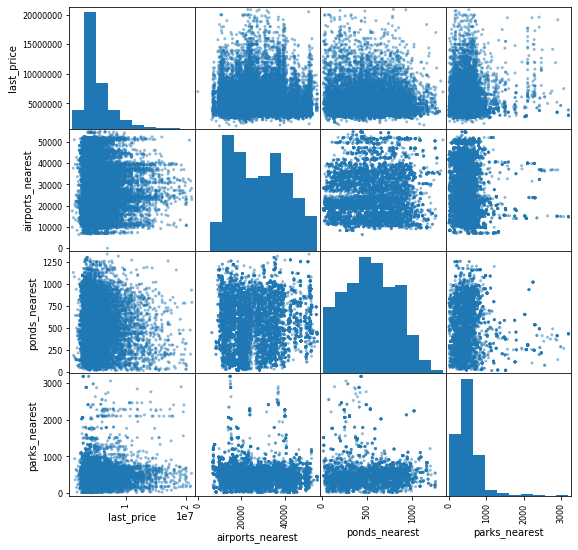

,last_price,airports_nearest,ponds_nearest,parks_nearest
last_price,1.000000,-0.026015,-0.108573,0.051140
airports_nearest,-0.026015,1.000000,0.083305,-0.097520
ponds_nearest,-0.108573,0.083305,1.000000,-0.026314
parks_nearest,0.051140,-0.097520,-0.026314,1.000000


In [94]:
print('Для всего города')
dfcorr=df2.loc[:,['last_price','airports_nearest','ponds_nearest','parks_nearest']]
dfcorr
pd.plotting.scatter_matrix(dfcorr, figsize=(9, 9))
plt.show()
dfcorr.corr()

Для центра


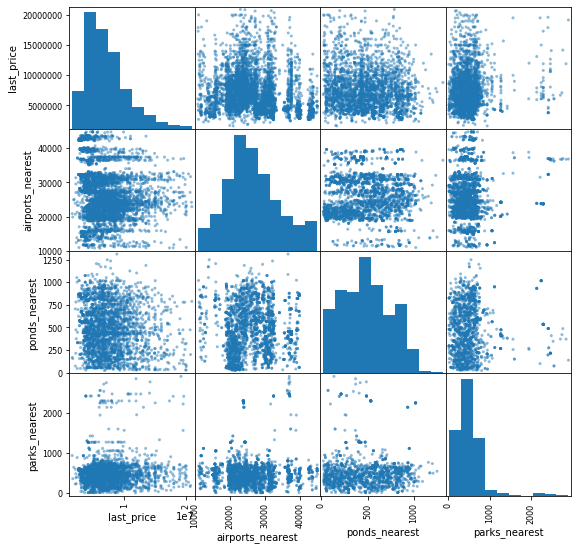

,last_price,airports_nearest,ponds_nearest,parks_nearest
last_price,1.000000,-0.148326,-0.112465,0.077259
airports_nearest,-0.148326,1.000000,0.010606,0.032166
ponds_nearest,-0.112465,0.010606,1.000000,0.035049
parks_nearest,0.077259,0.032166,0.035049,1.000000


In [90]:
print('Для центра')
dfcorr=df3.loc[:,['last_price','airports_nearest','ponds_nearest','parks_nearest']]
dfcorr
pd.plotting.scatter_matrix(dfcorr, figsize=(9, 9))
plt.show()
dfcorr.corr()

##### Вывод 5.2.1 
Кореляции между растоянием до аэропорта и цной соствила -0,14 в лучшем случае для центра. В остальном коэф пирсона на порядок меньше, делаю вывод что кореляции нет.

#### 5.2.2 Кореляция ценны от площади кухни, соотношения площади кухни и полной площади, соотношения жилой площади и полной площади.

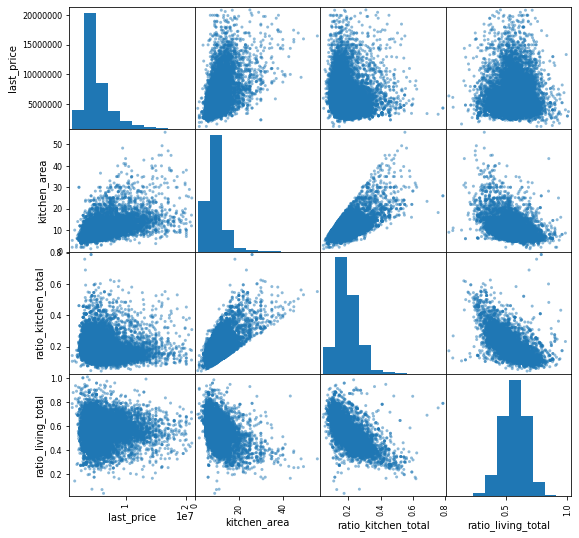

,last_price,kitchen_area,ratio_kitchen_total,ratio_living_total
last_price,1.000000,0.582685,-0.115439,0.023462
kitchen_area,0.582685,1.000000,0.578545,-0.450898
ratio_kitchen_total,-0.115439,0.578545,1.000000,-0.749702
ratio_living_total,0.023462,-0.450898,-0.749702,1.000000


In [96]:
df2corr=df2.loc[:,['last_price','kitchen_area','ratio_kitchen_total','ratio_living_total']]
pd.plotting.scatter_matrix(dfcorr, figsize=(9, 9))
plt.show()
df2corr.corr()

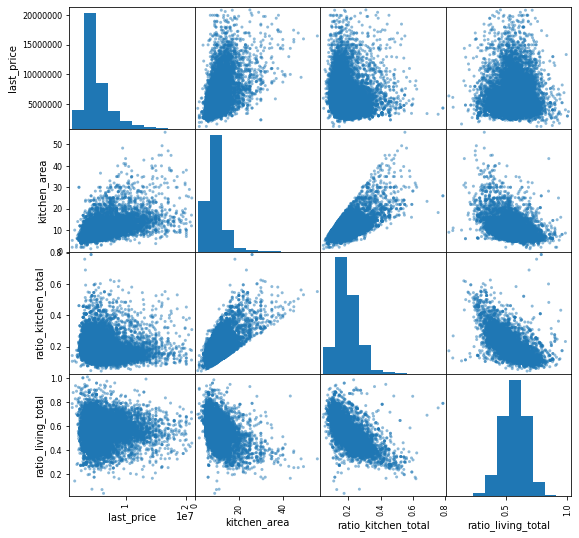

,last_price,kitchen_area,ratio_kitchen_total,ratio_living_total
last_price,1.000000,0.538111,-0.017832,-0.031904
kitchen_area,0.538111,1.000000,0.670284,-0.484708
ratio_kitchen_total,-0.017832,0.670284,1.000000,-0.727808
ratio_living_total,-0.031904,-0.484708,-0.727808,1.000000


In [97]:
df3corr=df3.loc[:,['last_price','kitchen_area','ratio_kitchen_total','ratio_living_total']]
pd.plotting.scatter_matrix(dfcorr, figsize=(9, 9))
plt.show()
df3corr.corr()

##### Вывод 5.2.2 
1. Цена корелирует с площадью кухни с коэф 0,53 для центра и 0,58 для Санкт-Петербурга. Вероятно это связано с тем что тем кто живёт не в центре а в спальных районах площадь кухни важнее чем тем кто живёт в туристической зоне.

### Шаг 6. Общий вывод

1. Параметры которые влияют на цену:
    Как для всего дата сета, так и для центрального района Сантк-Петербурга было установлено:
        1. Существует положительная корреляции цены от таких параметров как: площадь квартиры, количество комнат, количество   фотографий, количество прудов, количество парков, количество балконов, высота потолков, площадь кухни.
        2. Существует отрицательная корреляции цены от растояния до центра города и растояния до аэропорта.
        3. Цена за квартиры на первых этажах ниже чем за последние, а последние ниже чем все другие. 
2. Параметры которые не влияют на цену ни в центре ни во всем датасете:
    1. Растояние до ближайшего пруда, парка. Одновременно с этим от количетсва (или наличия)прудов или парков цена всё же зависит. Что говорит нам о том что факт наличия рядом пруда или парка положительно корелирует с ценой. 
3. День недели в котором было размещено объявление. Самая низкая средняя ценна для объявлений которые были размещены в субботу.
4. Месяц в котором было размещено объявление. Самая низкая средняя цена для объявлений размещенных в июле.
    Такая картина характерна как для всего датасета так и для центра. 
    
    
В целом в центре квартиры более дорогие, большие, с большим количеством комнат и с высокими потолками. 